<a href="https://colab.research.google.com/github/Eshwar-Naidus/task-1/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 3: Model Training & Evaluation ---
Successfully loaded the Wine Quality dataset.
Target 'quality_label' created. Class distribution:
quality_label
1    855
0    744
Name: count, dtype: int64

Data split: 1279 training samples, 320 testing samples.

Training the Decision Tree Classifier...
Model training complete.

Making predictions on the test set...

--- Model Evaluation Metrics ---
Accuracy:  0.7531
Precision: 0.7644 (Of all 'good' predictions, 76.44% were correct)
Recall:    0.7778 (The model found 77.78% of all actual 'good' wines)
F1-Score:  0.7710 (The harmonic mean of Precision and Recall)

Generating and saving the Confusion Matrix plot...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Saved 'wine_confusion_matrix.png' to /content/wine_confusion_matrix.png

--- Task 3 Complete. ---


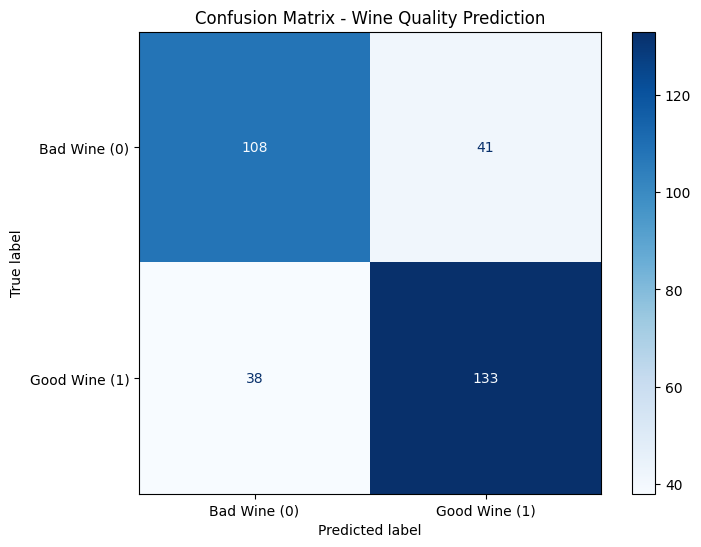

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

print("--- Task 3: Model Training & Evaluation ---")

# --- 1. Import & Prepare Dataset ---

# Load the Red Wine Quality dataset from a reliable URL
DATASET_URL = "https://raw.githubusercontent.com/plotly/datasets/master/winequality-red.csv"

try:
    df = pd.read_csv(DATASET_URL)
    print("Successfully loaded the Wine Quality dataset.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# This is a classification task (based on requested metrics).
# The 'quality' score is 0-10. We'll simplify this to a binary
# classification problem: 0 = "bad", 1 = "good"
# We'll set the threshold at > 5 for "good"
df['quality_label'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Drop the original 'quality' column as we now have our target 'quality_label'
df = df.drop(columns=['quality'])

print(f"Target 'quality_label' created. Class distribution:\n{df['quality_label'].value_counts()}")

# Define our features (X) and our target (y)
X = df.drop(columns=['quality_label'])
y = df['quality_label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# --- 2. Choose & 3. Train the Model ---
# We'll use a Decision Tree Classifier as suggested
model = DecisionTreeClassifier(random_state=42)

print("\nTraining the Decision Tree Classifier...")
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Make Predictions ---
print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test)

# --- 5. Evaluate the Model ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f} (Of all 'good' predictions, {precision*100:.2f}% were correct)")
print(f"Recall:    {recall:.4f} (The model found {recall*100:.2f}% of all actual 'good' wines)")
print(f"F1-Score:  {f1:.4f} (The harmonic mean of Precision and Recall)")

# --- 6. Visualize the Confusion Matrix ---
print("\nGenerating and saving the Confusion Matrix plot...")

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    ax=ax,
    cmap='Blues',
    display_labels=['Bad Wine (0)', 'Good Wine (1)']
)
plt.title("Confusion Matrix - Wine Quality Prediction")
plt.savefig('wine_confusion_matrix.png')
print(f"Saved 'wine_confusion_matrix.png' to {os.path.abspath('wine_confusion_matrix.png')}")

print("\n--- Task 3 Complete. ---")